# Module 2

### LoanTronic employee roster demographic analysis

This notebook is designed to clean and analyze the employee roster based on a set of categorical demographic dimensions.

> [Inspect and Clean](#Inspect)

> [Interpret the Data](#Interpret)

In [157]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [158]:
df = pd.read_csv('roster.csv')

<a name="Inspect"></a>
## Inspect and Clean Data
- Produce a list of departments with the headcount by department to make sure all department names are correct.
- Inspect the other categorical variable and identify the columns where the data does not fit the allowed categories.
- Use Python to clean the identified categorical values, and convert the clean columns into categorical dtype.
- Some values in the ethnicity column are ambiguous. Fix this issue to more clearly represent the data, and explain the process you used.

In [159]:
# Headcount by department
df.groupby('department')['employee_id'].count()

department
Advanced Technology                  2
Algorithm Development               46
Back End                            19
Channel Marketing                    8
Compliance                          11
East Coast Lender Relations          1
East Coast Lending                  12
Engineering                          2
FHA Loans                            9
Finance                             18
Finance & Admin                      2
Financial Planning & Analysis        6
Front End                           35
Full Stack                          41
Human Resources                     15
Leadership                           2
Lender Portal                        8
Loan Officer Portal                  5
Loan Operations                      4
Marketing                           12
Midwest Lender Relations             1
Midwest Lending                      8
New Home Purchase                    7
Product                              2
Product Architechture                8
Realtor Portal

`Department:` I have no master listing of departments to validate against - it does seem possible that the 'Lender Relations' departments are incorrect and should be grouped with the related 'Lending' departments, as they each only have one employee, but there is no way to know for sure so we will assume the Controller has categorized this data correctly.

In [160]:
# Unique function values
df['function'].unique()

array(['CEO', 'Engineering', 'Advanced Technology', 'Loan Operations',
       'Finance & Admin', 'Marketing', 'Product', 'Compliance'],
      dtype=object)

In [161]:
# Dictionary mapping data values to appropriate fields
func_key = {
        'CEO': 'Leadership', 'Engineering': 'Engineering', 'Advanced Technology': 'Technology', 
        'Loan Operations': 'Loan Operations', 'Finance & Admin': 'Finance & Administration', 
        'Marketing':'Marketing', 'Product':'Product', 'Compliance':'Compliance'
        }
        
# Apply mapping to dataframe values
df['function'] = df['function'].map(func_key)

In [162]:
# Unique location values
df['location'].unique()

array(['Mountain View, CA', 'New York, NY', 'Mnt View, CA',
       'Mntn View, CA', 'New York, N.Y.', 'New York, New York',
       'Atlanta, GA', 'Austin, TX', 'Chicago, IL', 'MV, CA',
       'Mountain View, Cali', 'Mountain View, Calif.',
       'Mountain View, California'], dtype=object)

In [163]:
# Dictionary mapping first letter of state to appropriate location value
loc_key = {
    'C': 'Mountain View, CA',
    'N': 'New York, NY',
    'T': 'Austin, TX',
    'I': 'Chicago, IL',
    'G': 'Atlanta, GA'
}

# Apply mapping with lambda function and string manipulation
df['location'] = df['location'].apply(lambda x: loc_key[x.split(', ')[1][0]])

In [164]:
# Unique ethnicity values
df['ethnicity'].unique()

array(['hispanic', 'white', 'asian', 'mixed_race', 'East Asian',
       'african_american', nan, 'Latin', 'Mixed', 'African', 'caucasian',
       'Southeast Asian', 'multiple', 'Mexican'], dtype=object)

In [165]:
len(df[df['ethnicity'].isna()])

6

`Ethnicity:` Note that 6 records contain a 'NaN' value in the ethnicity field, likely meaning that these employees declined to provide their ethnicity. These values will be replaced with 'Not reported'.

In [166]:
df['ethnicity'] = df['ethnicity'].fillna('Not reported')

# Conditional logic tree function
def ethnic(text):
    if 'asian' in text.lower():
        return 'asian'
    elif text in ['Mexican','Latin']:
        return 'hispanic'
    elif 'african' in text.lower():
        return 'african_american'
    elif text in ['multiple','Mixed']:
        return 'mixed_race'
    elif text == 'caucasian':
        return 'white'
    else:
        return text

# Apply conditional function to ethnicity field
df['ethnicity'] = df['ethnicity'].apply(ethnic)

In [167]:
df.employment_status.unique()

array(['Full time', 'Part time'], dtype=object)

In [168]:
df.tenure.unique()

array(['1 to less than 2 years', '2 to less than 4 years',
       '4 to less than 6 years', 'less than 6 months',
       '6 months to less than 1 year'], dtype=object)

In [169]:
conv_dict = {x: 'category' for x in ['function','location','ethnicity','employment_status','tenure','age']}
df = df.astype(conv_dict)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   employee_id        381 non-null    int64   
 1   title              381 non-null    object  
 2   last               381 non-null    object  
 3   first              381 non-null    object  
 4   manager_id         380 non-null    float64 
 5   function           381 non-null    category
 6   department         381 non-null    object  
 7   location           381 non-null    category
 8   age                381 non-null    category
 9   sex                381 non-null    object  
 10  ethnicity          381 non-null    category
 11  employment_status  381 non-null    category
 12  tenure             381 non-null    category
dtypes: category(6), float64(1), int64(1), object(5)
memory usage: 24.5+ KB


In [171]:
df.to_csv('roster_clean.csv')

<a name="Interpret"></a>
## Interpret the Data
- Produce the output of the describe function (mean, standard dev, etc.) for the numerical values.
- Interpret the described function output. Do any variables appear significantly skewed? Are the range of values as expected?
- Create a visualization of the data using an approach that allows you to meaningfully interpret the data.
- Interpret the visualization to identify patterns and trends in the data.
- Describe the demographic profile of the employee population, based on the insights you can gather from the patterns and trends

In [172]:
df.head(1)

,employee_id,title,last,first,manager_id,function,department,location,age,sex,ethnicity,employment_status,tenure
0,343,CEO,Duran,Veronica,NaN,Leadership,Leadership,"Mountain View, CA",35 - 44,F,hispanic,Full time,1 to less than 2 years


In [173]:
df.describe()

,employee_id,manager_id
count,381.000000,380.000000
mean,391.624672,373.263158
std,220.129539,227.816779
min,4.000000,11.000000
25%,206.000000,183.000000
50%,396.000000,365.000000
75%,578.000000,572.000000
max,769.000000,756.000000


The values described don't appear to be terribly skewed, however, these are unique identifier fields and not true numerical fields for which descriptive statistics are meaningful. The only data field that could potentically provide numerical data in our dataset is 'age', which is currently included as a range and would require transformation to fit a numerical value we can use for statistical analysis.

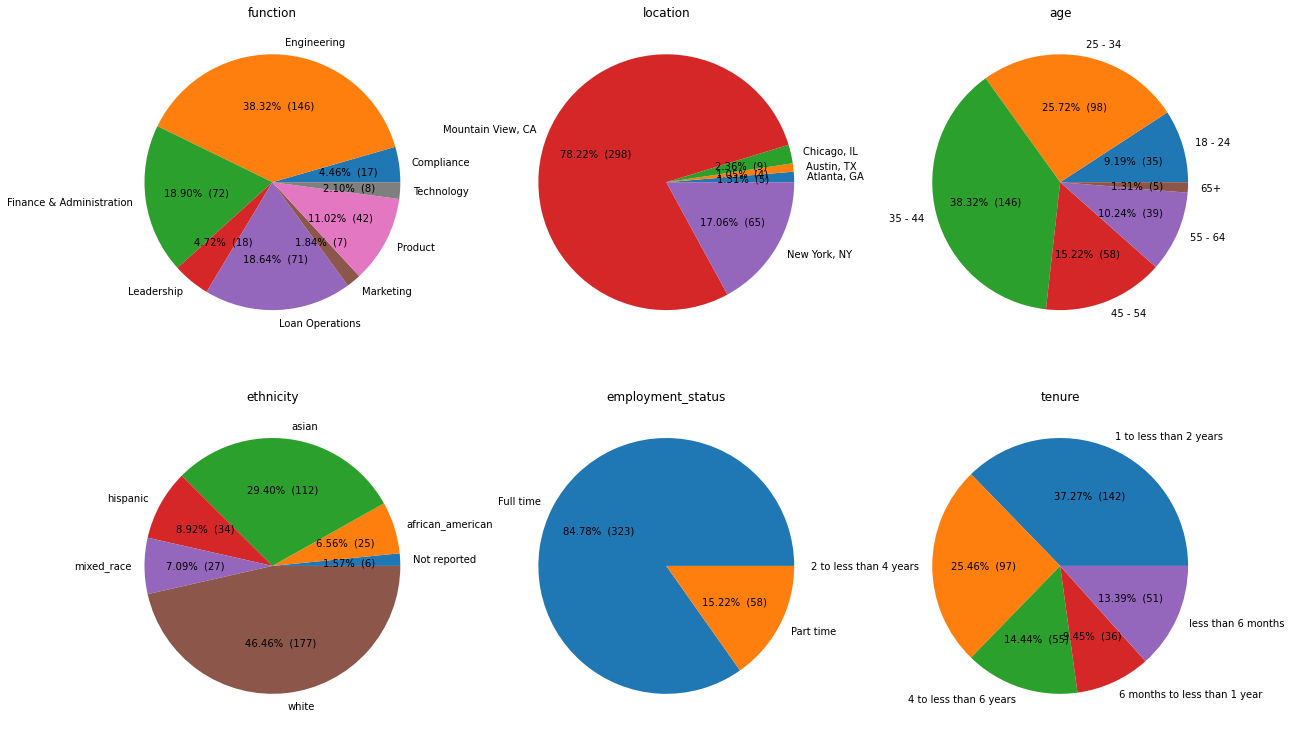

In [174]:
# Standard matplotlib verion
fig = plt.figure(figsize=(20,20))
x = 1

# Subplots for categorical variables
for nm, dtp in zip(df.dtypes.index, df.dtypes):
    if str(dtp) == 'category':
        tmp = df.groupby(nm)['employee_id'].count()
        ax = fig.add_subplot(3,3,x)
        ax.pie(tmp, labels=tmp.index, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(tmp)/100))
        ax.set_title(nm)
        x += 1

plt.show();

In [175]:
# Classic plotly - express has limited subplots
fig = plotly.subplots.make_subplots(rows=2,cols=3,specs=[[{'type':'pie'} for x in range(0,3)] for y in range(0,2)])

# Subplots for categorical variables
i = 0
for nm, dtp in zip(df.dtypes.index, df.dtypes):
    if str(dtp) == 'category':
        tmp = df.groupby(nm)['employee_id'].count()
        fig.add_trace(plotly.graph_objects.Pie(values=tmp, labels=tmp.index, textinfo='label+percent', insidetextorientation='radial', title=nm), col=i % 3 + 1, row=i//3+1)
        i+=1
fig.update_layout(height=700,width=1300,showlegend=False)
fig.show()

In [177]:
# Classic plotly - express has limited subplots
fig = plotly.subplots.make_subplots(rows=2,cols=3,specs=[[{'type':'bar'} for x in range(0,3)] for y in range(0,2)])

# Subplots for categorical variables
i = 0
for nm, dtp in zip(df.dtypes.index, df.dtypes):
    if str(dtp) == 'category':
        tmp = df.groupby(nm)['employee_id'].count()
        fig.add_trace(plotly.graph_objects.Bar(y=tmp, x=tmp.index, text=tmp, textposition='inside'), col=i % 3 + 1, row=i//3+1)
        i+=1
fig.update_layout(height=700,width=1300,showlegend=False)
fig.show()

## Interpretation
Based on the review of the demographic information in the charts above, it appears that our company is a typical tech startup.
- Our company has nearly all of our employees in Mountain View, California. One of the highest costs of living in the country, but we need to be where the action is!
- The majority of our employees have been employed for 0-2 years. Turnover in the tech space is high, especially for young professionals that commonly move freely between employers.
- Our employees are largely young, with a relatively small share (~26%) of employees above 45 years old
- The largest share of our employees are in engineering and back-office (finance & admin) functions
- Our workforce has includes a relatively small share of people of color

While is no prompt to make recommendations based on the trends identified in the data, as a consultant I can hardly help myself.
I would recommend that the company consider investing in programs to promote employee diversity and retention, consider moving or expanding to lower cost cities to reduce the cost of labor, and leverage automation to clean up all of this messy data!

In [180]:
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook_connected'
!jupyter nbconvert --to html LoanTronic_Roster.ipynb

[NbConvertApp] Converting notebook LoanTronic_Roster.ipynb to html
[NbConvertApp] Writing 808940 bytes to LoanTronic_Roster.html
